In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore') 

np.random.seed(1234)

In [2]:
mu_feats = np.load('../train_data/AllGlobal_Mu_Final.npy')
std_feats = np.load('../train_data/AllGlobal_Std_Final.npy')

In [3]:
data = pd.read_csv('../test_data/TestOriginal.csv')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,APOGEE_ID_1,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,...,age_68L,ageErr,logAge,logAgeErr,distKpc,distKpc_68u,distKpc_68l,distErrKpc,logDistKpc,logDistKpcErr
0,1721,1910,2M18493114+4440466,2105414275836588544,2.484758,4916.8970,0.014891,-0.168967,-0.153072,0.304528,...,3.8735,0.48350,0.656807,0.048393,1.291147,1.301632,1.281032,0.010300,0.110976,0.003464
1,2334,2564,2M19141724+4706053,2130805435296026880,3.141841,4836.6406,-0.013280,0.190422,-0.136165,0.277245,...,4.8417,1.39540,0.783746,0.098834,1.159030,1.176261,1.143668,0.016297,0.064095,0.006102
2,443,550,2M19375183+3949461,2076462107459336192,2.691003,5107.7954,-0.006319,-0.017812,-0.198534,0.457206,...,0.4315,0.06570,-0.336205,0.057725,1.232842,1.243173,1.220394,0.011389,0.090907,0.004016
3,2332,2562,2M19094793+4707291,2130479945494856064,2.607918,4599.9634,0.088488,0.011713,0.037761,0.240304,...,8.0353,2.90385,1.005245,0.118114,1.902386,1.934231,1.865262,0.034484,0.279299,0.007884
4,2882,3141,2M19395636+4945522,2135128886815572736,2.508830,4849.5620,-0.017498,0.050134,-0.182170,0.297120,...,2.7227,0.25120,0.472522,0.036772,1.065591,1.072708,1.058693,0.007008,0.027590,0.002856


In [5]:
len(data)

608

In [6]:
feats = ['LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']

featsErr = ['LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR']


In [7]:
for i in range(len(feats)):
    scaledFeat = (data[feats[i]] - mu_feats[i])/std_feats[i]
    scaledEFeat = data[featsErr[i]]/std_feats[i]

    data[feats[i]+'_NORM'] = scaledFeat
    data[featsErr[i]+'_NORM'] = scaledEFeat

In [8]:
data.head()

,Unnamed: 0,Unnamed: 0.1,APOGEE_ID_1,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,1721,1910,2M18493114+4440466,2105414275836588544,2.484758,4916.8970,0.014891,-0.168967,-0.153072,0.304528,...,-0.990903,0.001779,-0.910916,0.000846,-0.859756,0.025264,-0.791949,0.023292,-0.794548,0.012817
1,2334,2564,2M19141724+4706053,2130805435296026880,3.141841,4836.6406,-0.013280,0.190422,-0.136165,0.277245,...,0.765663,0.001619,0.877330,0.000951,0.984503,0.024115,0.992249,0.022128,1.027756,0.012817
2,443,550,2M19375183+3949461,2076462107459336192,2.691003,5107.7954,-0.006319,-0.017812,-0.198534,0.457206,...,-1.362609,0.000832,-1.259081,0.000938,-1.126174,0.026412,-1.081939,0.032609,-1.049718,0.025633
3,2332,2562,2M19094793+4707291,2130479945494856064,2.607918,4599.9634,0.088488,0.011713,0.037761,0.240304,...,1.005992,0.001809,1.040637,0.000955,1.039624,0.024115,1.077266,0.019799,1.049894,0.016312
4,2882,3141,2M19395636+4945522,2135128886815572736,2.508830,4849.5620,-0.017498,0.050134,-0.182170,0.297120,...,-1.438139,0.001848,-1.407982,0.001378,-1.378812,0.024115,-1.377752,0.024457,-1.331686,0.018643


(array([  8.,  95., 141., 110.,  56.,  56.,  68.,  41.,  31.,   2.]),
 array([2.2898684 , 2.39525746, 2.50064652, 2.60603558, 2.71142464,
        2.8168137 , 2.92220276, 3.02759182, 3.13298088, 3.23836994,
        3.343759  ]),
 <a list of 10 Patch objects>)

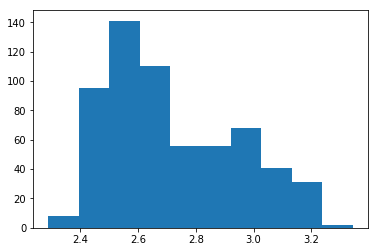

In [9]:
import matplotlib.pyplot as plt

plt.hist(data['LOGG'])

(array([  8.,  95., 141., 110.,  56.,  56.,  68.,  41.,  31.,   2.]),
 array([-1.90636523, -1.42470881, -0.94305239, -0.46139596,  0.02026046,
         0.50191688,  0.98357331,  1.46522973,  1.94688615,  2.42854257,
         2.910199  ]),
 <a list of 10 Patch objects>)

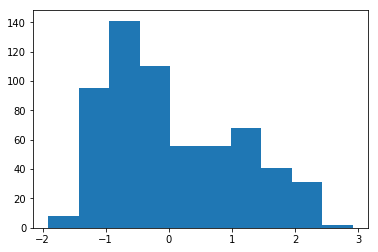

In [10]:
plt.hist(data['LOGG_NORM'])

(array([  8.,  95., 141., 110.,  56.,  56.,  68.,  41.,  31.,   2.]),
 array([-1.90636523, -1.42470881, -0.94305239, -0.46139596,  0.02026046,
         0.50191688,  0.98357331,  1.46522973,  1.94688615,  2.42854257,
         2.910199  ]),
 <a list of 10 Patch objects>)

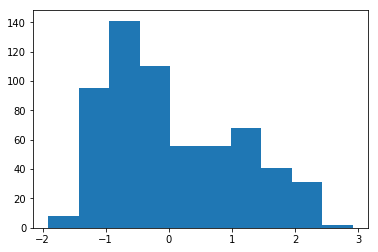

In [11]:
plt.hist((data['LOGG'] - mu_feats[0])/std_feats[0])

(array([  6.,  34.,  76., 100., 113., 125.,  84.,  46.,  17.,   7.]),
 array([-2.39329801, -1.87025315, -1.34720828, -0.82416342, -0.30111856,
         0.22192631,  0.74497117,  1.26801603,  1.7910609 ,  2.31410576,
         2.83715062]),
 <a list of 10 Patch objects>)

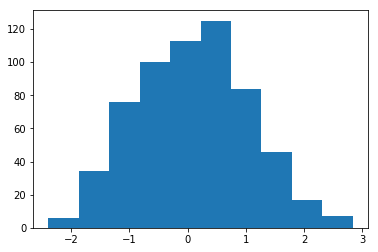

In [12]:
plt.hist((data['TEFF'] - mu_feats[1])/std_feats[1])

(array([  6.,  34.,  76., 100., 113., 125.,  84.,  46.,  17.,   7.]),
 array([-2.39329801, -1.87025315, -1.34720828, -0.82416342, -0.30111856,
         0.22192631,  0.74497117,  1.26801603,  1.7910609 ,  2.31410576,
         2.83715062]),
 <a list of 10 Patch objects>)

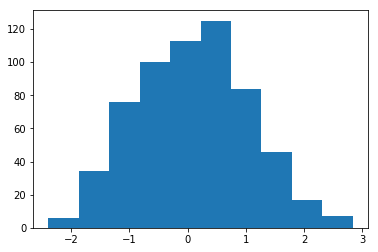

In [13]:
plt.hist(data['TEFF_NORM'])

In [14]:
data.to_csv('../test_data/TestOriginalNorm.csv')